In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [2]:
X = np.array(df.iloc[:,2:32].astype(float))
print(X)

[[  1.79900000e+01   1.03800000e+01   1.22800000e+02 ...,   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02 ...,   1.86000000e-01
    2.75000000e-01   8.90200000e-02]
 [  1.96900000e+01   2.12500000e+01   1.30000000e+02 ...,   2.43000000e-01
    3.61300000e-01   8.75800000e-02]
 ..., 
 [  1.66000000e+01   2.80800000e+01   1.08300000e+02 ...,   1.41800000e-01
    2.21800000e-01   7.82000000e-02]
 [  2.06000000e+01   2.93300000e+01   1.40100000e+02 ...,   2.65000000e-01
    4.08700000e-01   1.24000000e-01]
 [  7.76000000e+00   2.45400000e+01   4.79200000e+01 ...,   0.00000000e+00
    2.87100000e-01   7.03900000e-02]]


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["M", "B"])
list(le.classes_)
le.transform(df['diagnosis'])
y = le.transform(df['diagnosis'])

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)
print(pca.explained_variance_ratio_)

[  4.42720256e-01   1.89711820e-01   9.39316326e-02   6.60213492e-02
   5.49576849e-02   4.02452204e-02   2.25073371e-02   1.58872380e-02
   1.38964937e-02   1.16897819e-02   9.79718988e-03   8.70537901e-03
   8.04524987e-03   5.23365745e-03   3.13783217e-03   2.66209337e-03
   1.97996793e-03   1.75395945e-03   1.64925306e-03   1.03864675e-03
   9.99096464e-04   9.14646751e-04   8.11361259e-04   6.01833567e-04
   5.16042379e-04   2.72587995e-04   2.30015463e-04   5.29779290e-05
   2.49601032e-05   4.43482743e-06]


In [11]:
import matplotlib.pyplot as plt
#Plot Variance Ratio for PCA#Plot Var 
plt.bar(range(1, 31), pca.explained_variance_ratio_)
plt.xlabel('Principle Components',fontsize=18)
plt.ylabel('Explained Variance Ratio',fontsize=18)
plt.title('Breast_Cancer(Explained Variance vs Dimension)',fontsize=14)
plt.grid(True)
plt.show()
plt.clf()

<Figure size 640x480 with 1 Axes>

In [ ]:
cummulative_explained_variance_ = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, 31), cummulative_explained_variance_,color='red')
plt.xlabel('Principle Components',fontsize=18)
plt.ylabel('Cumulative Explained Variance',fontsize=14)
plt.title('Breast_Cancer(Cumulative Explained Variance vs Dimension)',fontsize=12)
plt.grid(True)
plt.show()
plt.clf()

In [7]:
X_pca = PCA(n_components=5).fit_transform(X_scaled)


In [9]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_pca)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
SSE=[17070.0, 11595.526607115784, 10061.797818243695, 9265.0697649793728, 8562.4248983481593, 7967.6360071851659, 7539.7825299229071, 7171.5891668032191, 6895.019391524017, 6600.2605157515518]
plt.plot(K, Sum_of_squared_distances, 'bx-',label='PCA')
plt.plot(K, SSE, 'r^-',label='RAW')
plt.legend(loc='upper right')
plt.xlabel('k(number of clusters)',fontsize=18)
plt.ylabel('SSE',fontsize=18)
plt.title('Breast_Cancer(K-means_PCA=7)',fontsize=14)
plt.show()

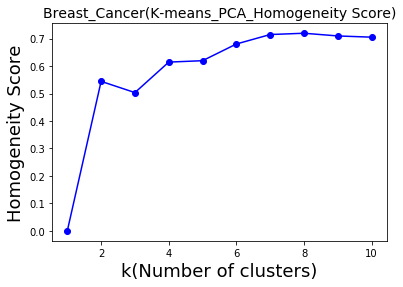

In [12]:
from sklearn import metrics
homogeneity_scores=[]
clusters=range(1,11)
for k in clusters:
    km = KMeans(n_clusters=k)
    km = km.fit(X_pca)
    lable = km.labels_
    homogeneity_scores.append(metrics.homogeneity_score(y,lable ))
plt.plot(clusters, homogeneity_scores,'bo-')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Homogeneity Score',fontsize=18)
plt.title('Breast_Cancer(K-means_PCA_Homogeneity Score)',fontsize=14)
plt.show()

In [ ]:
# PCA-kmeans Plot

clf = KMeans(init='k-means++', n_clusters=2, random_state=42)
clf.fit_predict(X_pca)

k = 2 # number of clusters
colors = ['g', 'r', 'b', 'y', 'c', 'm']
labels = ['Benign', 'Malignant']

# fix labels
clusters_kmeans = np.choose(clf.labels_, [1, 0])

fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X_pca[j] for j in range(len(X_pca)) if clf.labels_[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i], label=labels[i])


plt.xlabel("1st component",fontsize=18)
plt.ylabel("2nd component",fontsize=18)
plt.legend(loc=2)
plt.title('Breast_Cancer(Kmeans_PCA)',fontsize=14)


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
acc = []
for i in range (1, 31):
    X_pca = PCA(n_components=i).fit_transform(X)
    print(X_pca)
    #clf = DecisionTreeClassifier(max_depth=5)
    clf = KMeans(init='k-means++',n_clusters=2)
    clf.fit(X_pca)
    pred = clf.labels_
    acc.append(accuracy_score(pred, y))
print(acc)

In [ ]:
plt.plot(range(1, 31), acc)
plt.xlabel('Principle Components')
plt.ylabel('KNN Acc')
plt.title('acc')
plt.show()
plt.clf()

In [13]:
from sklearn.mixture import GaussianMixture as GMM
ll=[]
bic=[]
homogeinity_scores=[]
completeness_scores=[]
clusters=range(1,11)
model = GMM(covariance_type = 'full')
for k in clusters:
            model.set_params(n_components=k)
            model.fit(X_pca)
            labels = model.predict(X_pca)
            ll.append(model.score(X_pca))
            bic.append(model.bic(X_pca))
            homogeinity_scores.append(metrics.homogeneity_score(y,labels))
            completeness_scores.append(metrics.completeness_score(y,labels))
print(bic)

[11924.608399120529, 11262.243564778571, 11213.759127268235, 11187.307204927612, 11250.114148466757, 11286.17605595139, 11406.549571610825, 11353.145290820486, 11551.673097369208, 11598.351793484238]


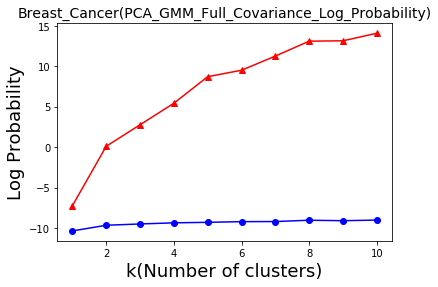

In [14]:
ll3=[-7.2446998437349652, 0.0984106555742887, 2.7588833840194749, 5.4181893760333599, 8.7015912316122375, 9.4994362119163966, 11.251063537729486, 13.092841877411272, 13.139897418432822, 14.073536392516209]
plt.plot(clusters, ll, 'bo-',label='PCA')
plt.plot(clusters,ll3,'r^-',label='RAW')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Log Probability',fontsize=18);
plt.title('Breast_Cancer(PCA_GMM_Full_Covariance_Log_Probability)',fontsize=14)
plt.show()

In [ ]:
plt.plot(clusters, homogeneity_scores,'bo-')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Homogeneity Score',fontsize=18)
plt.title('Breast_Cancer(PCA_GMM_Full_Covariance_Homogeneity Score)',fontsize=14)
plt.show()

In [ ]:

plt.plot(clusters, completeness_scores,'g^-')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Completeness Score',fontsize=18)
plt.title('Breast_Cancer(PCA_GMM_Full_Covariance_Completeness Score)',fontsize=14)
plt.show()

In [ ]:
bic2=[11384.689237062925, 6174.7941841756538, 6286.2584335971933, 6735.7435571933156, 7807.6451755694579, 9331.5570355781056, 9133.3432808520811, 9680.4796992095507, 11892.956328863042, 15037.456278903926]
plt.plot(clusters, bic,'g^-',label='PCA BIC')
plt.plot(clusters, bic2,'bo-',label='RAW BIC')
plt.legend(loc='upper right')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('BIC_score',fontsize=18)
plt.title('Breast_Cancer(GMM_BIC VS PCA_GMM_BIC)',fontsize=14)
plt.show()